<a href="https://colab.research.google.com/github/nixonleonard/KNN-Model-Testing/blob/main/Code_KNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error 
from collections import Counter
from sklearn import utils

#No 1 dan 2

##Import data & Transform it into DataFrame

In [ ]:
dataIris = load_iris()
data = pd.DataFrame(data=dataIris.data, columns=dataIris.feature_names)
data['target'] = pd.Series(dataIris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


##Spliting dan Normalisasi Data

In [ ]:
X = data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##K-Nearest Neighbour Function

Referensi diambil dari : https://towardsdatascience.com/how-to-build-knn-from-scratch-in-python-5e22b8920bd2
dan 
https://en.wikipedia.org/wiki/Hamming_distance.

Text(0, 0.5, 'Accuracy')

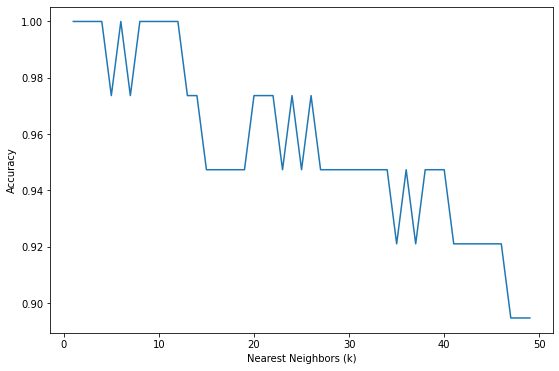

In [ ]:
knn_acc = []
max_acc = 0

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    knn_acc.append(accuracy_score(y_test,y_pred))
    if max_acc <= accuracy_score(y_test, y_pred) :
        max_acc = accuracy_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), knn_acc)
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('Accuracy')

In [ ]:
all_k_e = []
index = 0
for i in knn_acc:
    index = index+1
    if i == max_acc :
        all_k_e.append(index)

print('Akurasi terbesar knn terdapat pada k : ' + str(all_k_e) + ' dengan akurasi ' + str(max_acc))

Akurasi terbesar knn terdapat pada k : [1, 2, 3, 4, 6, 8, 9, 10, 11, 12] dengan akurasi 1.0


###Hamming Distance

In [ ]:
def hamming_formula(a, b):
	dist = 0
	for n in range(len(a)):
		if a[n] != b[n]:
			dist += 1
	return dist

In [ ]:
def knn_hamming(X_train, X_test, y_train, y_test, k):
    y_pred = []
    for test_point in X_test:
        dist_container = []
        for train_point in X_train:
            dist = hamming_formula(test_point, train_point)
            dist_container.append(dist)
        data_dist = pd.DataFrame(data=dist_container, columns=['dist'], index=y_train.index)
        data_f_dist = data_dist.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[data_f_dist.index])
        prediction = counter.most_common()[0][0]
        y_pred.append(prediction)
        
    return y_pred

Text(0, 0.5, 'Accuracy')

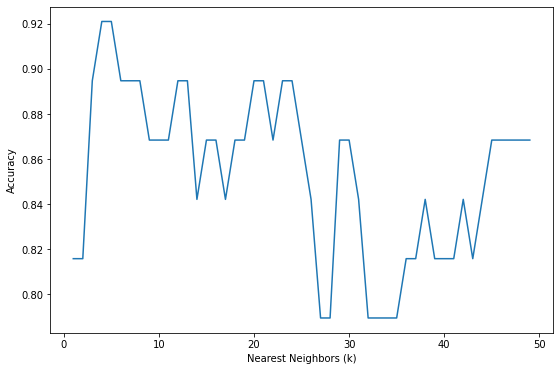

In [ ]:
max_acc = 0
hamming_acc = []
y_pred = 0

for k in range(1,50):
    y_pred = knn_hamming(X_train, X_test, y_train, y_test, k)
    hamming_acc.append(accuracy_score(y_test, y_pred))
    if max_acc <= accuracy_score(y_test, y_pred) :
        max_acc = accuracy_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), hamming_acc)
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('Accuracy')

In [ ]:
all_k_h = []
index = 0
for i in hamming_acc:
    index = index+1
    if i == max_acc :
        all_k_h.append(index)

print('Akurasi terbesar hamming terdapat pada k : ' + str(all_k_h) + ' dengan akurasi ' + str(max_acc))

Akurasi terbesar hamming terdapat pada k : [4, 5] dengan akurasi 0.9210526315789473


###Minkowski Distance (Manhattan Distance & Euclidean Distance) 
The p parameter of the Minkowski Distance metric of SciPy represents the order of the norm. When the order(p) is 1, it will represent Manhattan Distance and when the order in the above formula is 2, it will represent Euclidean Distance.

In [ ]:
def minkowski_formula(a, b, p):
    dim = len(a)                                   
    dist = 0                                             
    for d in range(dim):                        
        dist += abs(a[d] - b[d])**p
    dist = dist**(1/p)
    
    return dist

In [ ]:
def knn_minkowski(X_train, X_test, y_train, y_test, k, p):
    y_pred = []
    for test_point in X_test:
        dist_container = []
        for train_point in X_train:
            dist = minkowski_formula(test_point, train_point, p=p)
            dist_container.append(dist)
        data_dist = pd.DataFrame(data=dist_container, columns=['dist'], index=y_train.index)
        data_f_dist = data_dist.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[data_f_dist.index])
        prediction = counter.most_common()[0][0]
        y_pred.append(prediction)
        
    return y_pred

####Menampilkan Manhattan Accuracy each k

Text(0, 0.5, 'Accuracy')

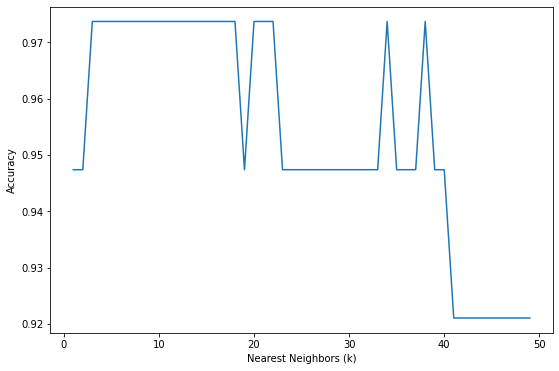

In [ ]:
max_acc = 0
manhattan_acc = []

for k in range(1,50):
    y_pred = knn_minkowski(X_train, X_test, y_train, y_test, k, p=1)
    manhattan_acc.append(accuracy_score(y_test, y_pred))
    if max_acc <= accuracy_score(y_test, y_pred) :
        max_acc = accuracy_score(y_test, y_pred)


fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), manhattan_acc)
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('Accuracy')

In [ ]:
all_k_m = []
index = 0
for i in manhattan_acc:
    index = index+1
    if i == max_acc :
        all_k_m.append(index)

print('Akurasi terbesar manhattan terdapat pada k : ' + str(all_k_m) + ' dengan akurasi ' + str(max_acc))

Akurasi terbesar manhattan terdapat pada k : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 34, 38] dengan akurasi 0.9736842105263158


Text(0, 0.5, 'Accuracy')

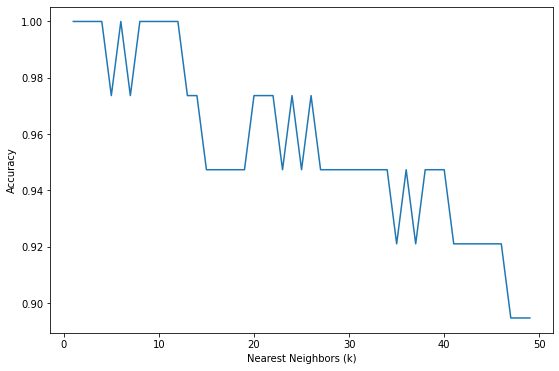

In [ ]:
max_acc = 0
euclidean_acc = []

for k in range(1,50):
    y_pred = knn_minkowski(X_train, X_test, y_train, y_test, k, p=2)
    euclidean_acc.append(accuracy_score(y_test, y_pred))
    if max_acc <= accuracy_score(y_test, y_pred) :
        max_acc = accuracy_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(range(1,50), euclidean_acc)
ax.set_xlabel('Nearest Neighbors (k)')
ax.set_ylabel('Accuracy')

In [ ]:
all_k_e = []
index = 0
for i in euclidean_acc:
    index = index+1
    if i == max_acc :
        all_k_e.append(index)

print('Akurasi terbesar euclidean terdapat pada k : ' + str(all_k_e) + ' dengan akurasi ' + str(max_acc))

Akurasi terbesar euclidean terdapat pada k : [1, 2, 3, 4, 6, 8, 9, 10, 11, 12] dengan akurasi 1.0


#No 3 dan 4
Disini saya menggunakan data dalam link tersebut
https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv

###Import datasets

In [ ]:
url = 'https://raw.githubusercontent.com/mk-gurucharan%20/Regression/master/Startups_Data.csv'
data = pd.read_csv(url)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


###Cek jika ada yang NaN

In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Dikarenakan ada data yang bukan numeric pada kolom state, maka kita ubah dulu dengan label encoder

In [ ]:
LE = LabelEncoder()
data['State'] = LE.fit_transform(data['State'])
data.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


keterangan : 
State = 0 (California)
State = 1 (Florida)
State = 2 (NewYork)

##Sebelum Data Preparation

###Splitting Data

In [ ]:
X = data[['R&D Spend','Administration','Marketing Spend','State']]
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test,y_test

(array([[-0.14846372,  0.12822262,  1.18523774,  1.4613669 ],
        [-0.73536835, -1.56107081, -0.05112143,  1.4613669 ],
        [-1.12357847, -0.23942669, -0.32509148, -1.1134224 ],
        [-1.31531948, -2.31461715, -0.22068913,  1.4613669 ],
        [ 1.68092299, -0.9259408 ,  1.64364719,  0.17397225],
        [ 1.47693807, -0.23446341,  1.43655002,  1.4613669 ],
        [-1.75813754, -2.87504828, -1.7718515 ,  1.4613669 ],
        [-0.29471135,  1.12117401, -0.87481788,  1.4613669 ],
        [-1.74074177, -0.34712898,  0.71578794,  0.17397225],
        [-0.39523169,  1.10814877, -1.03322994,  1.4613669 ],
        [-0.34411839,  0.18168475, -1.38599521, -1.1134224 ],
        [-0.90305991, -1.64255651, -0.30664123, -1.1134224 ],
        [-0.00717001,  1.1504238 ,  0.73774801,  1.4613669 ]]), 27    105008.31
 35     96479.51
 40     78239.91
 38     81229.06
 2     191050.39
 3     182901.99
 48     35673.41
 29    101004.64
 46     49490.75
 31     97483.56
 32     97427.84
 39   

###Model KNN Minkowski

Dari No 1 dan 2 diatas, saya mengimplementasikan Model KNN Minkowski Distance : Euclidean Distance untuk melakukan test pada data diatas ini

In [ ]:
def minkowski_formula(a, b, p):
    dim = len(a)                                   
    dist = 0                                             
    for d in range(dim):                        
        dist += abs(a[d] - b[d])**p
    dist = dist**(1/p)
    
    return dist
def knn_minkowski(X_train, X_test, y_train, y_test, k, p):
    y_pred = []
    for test_point in X_test:
        dist_container = []
        for train_point in X_train:
            dist = minkowski_formula(test_point, train_point, p=p)
            dist_container.append(dist)
        data_dist = pd.DataFrame(data=dist_container, columns=['dist'], index=y_train.index)
        data_f_dist = data_dist.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[data_f_dist.index])
        prediction = counter.most_common()[0][0]
        y_pred.append(prediction)
        
    return y_pred

###Panggil Modeling dan tampilkan Data Frame

In [ ]:
y_pred = knn_minkowski(X_train, X_test, y_train, y_test, k, p=2)

df = pd.DataFrame({
    'GroundTruth' : y_test,
    'Prediction' : y_pred
})
df

,GroundTruth,Prediction
27,105008.31,125370.37
35,96479.51,108552.04
40,78239.91,71498.49
38,81229.06,77798.83
2,191050.39,166187.94
3,182901.99,156991.12
48,35673.41,77798.83
29,101004.64,122776.86
46,49490.75,90708.19
31,97483.56,122776.86


###Menampilkan MSE dan R2 Score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("MSE : " + str(mse))
print("R2 Score = " + str(r2s))

MSE : 529371082.8266923
R2 Score = 0.7035325609349599


##Sesudah Data Preparation

###Menampilkan Correlation Matrix

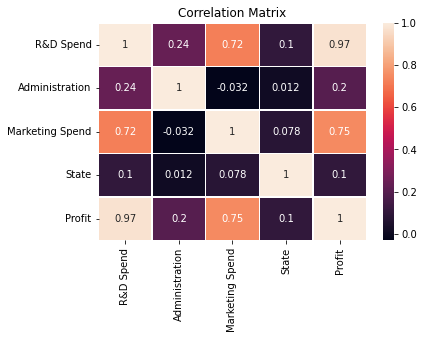

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,).set_title('Correlation Matrix')

plt.show()

disini dari tabel correlation matrix diatas, bisa dilihat bahwa relasi antar class dengan profit (Target). Pada kasus ini saya akan gunakan classes atau independent variabel yang memiliki korelasi >0.5, jadi tabel administration dan state akan saya drop.

###Mendrop kolom yang tidak begitu dibutuhkan

In [ ]:
data = data.drop('Administration', axis = 1)
data = data.drop('State', axis = 1)
data.head(20)

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


Dikarenakan masih ada data yang memiliki nilai 0, maka akan kita hapus baris yang memiliki nilai 0

###Mencari outliers dari boxplot

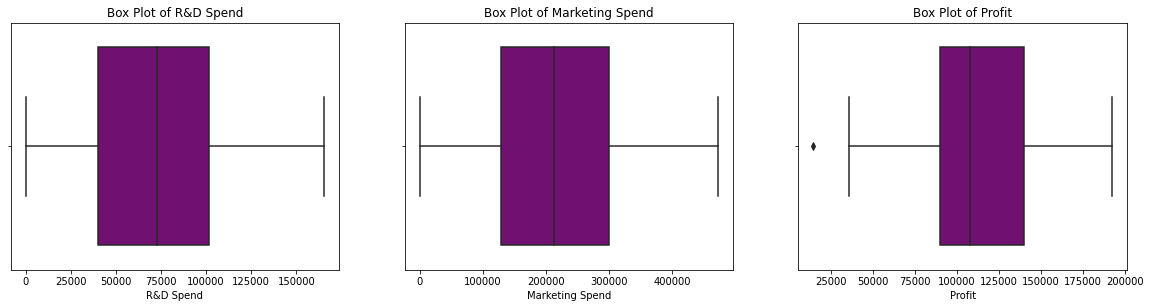

In [ ]:
plt.figure(figsize=(20,10))
for i, col in zip(range(1, 7), data.columns):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, data=data, color='purple')
    plt.title(f"Box Plot of {col}")
plt.show()

Dari data diatas tidak terdapat outliers pada kedua independent variabel jadi tidak perlu melakukan apa apa.

###Melakukan Splitting dan Standardisasi

In [ ]:
X = data[['R&D Spend','Marketing Spend']]
y = data['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###Model KNN Minkowski Distance 

Dari No 1 dan 2 diatas, saya mengimplementasikan Model KNN Minkowski Distance : Euclidean Distance untuk melakukan test pada data diatas ini

In [ ]:
def minkowski_formula(a, b, p):
    dim = len(a)                                   
    dist = 0                                             
    for d in range(dim):                        
        dist += abs(a[d] - b[d])**p
    dist = dist**(1/p)
    
    return dist
def knn_minkowski(X_train, X_test, y_train, y_test, k, p):
    y_pred = []
    for test_point in X_test:
        dist_container = []
        for train_point in X_train:
            dist = minkowski_formula(test_point, train_point, p=p)
            dist_container.append(dist)
        data_dist = pd.DataFrame(data=dist_container, columns=['dist'], index=y_train.index)
        data_f_dist = data_dist.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[data_f_dist.index])
        prediction = counter.most_common()[0][0]
        y_pred.append(prediction)
        
    return y_pred

###Memanggil Model dan menampilkan Data Frame

In [ ]:
y_pred = knn_minkowski(X_train, X_test, y_train, y_test, k, p=2)

df = pd.DataFrame({
    'GroundTruth' : y_test,
    'Prediction' : y_pred
})
df

,GroundTruth,Prediction
27,105008.31,108733.99
35,96479.51,96712.80
40,78239.91,77798.83
38,81229.06,90708.19
2,191050.39,191792.06
3,182901.99,166187.94
48,35673.41,42559.73
29,101004.64,103282.38
46,49490.75,90708.19
31,97483.56,99937.59


###Menampilkan MSE dan R2Score

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)

print("MSE : " + str(mse))
print("R2 Score = " + str(r2s))

MSE : 175305015.05789998
R2 Score = 0.9018226900646766


Diatas merupakan tabel dan data yang menunjukan groundtruth dengan prediction sesudah dilakukannya data preparation. Kita bisa lihat perbedaan setelah data preparation, akurasi skor dari r2_score lebih baik dan MSE lebih rendah